<a href="https://colab.research.google.com/github/chape8/Signal-Processing-III/blob/main/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import seaborn as sns


#ruta = '/content/drive/MyDrive/Colab_Notebooks/Miniproyecto1/'
ruta = '/content/drive/MyDrive/Señales3/ArchivosLab5/'
fileName = 'DataMP1.csv'
dataFrame = pd.read_csv(ruta+fileName)

labels = dataFrame.iloc[:,-1]
X = dataFrame.iloc[:,1:43]

X

,GSR_ASR,GSR_ART,GSR_SP1,GSR_SP2,GSR_SP3,GSR_SP4,GSR_SP5,GST_SP6,GST_SP7,GST_SP8,...,EEG_SPA1,EEG_SPA2,EEG_SPA3,EEG_SPA4,EEG_SPA5,EEG_SPB1,EEG_SPB2,EEG_SPB3,EEG_SPB4,EEG_SPB5
0,10185.8373,2.8610,5824.086256,3160.889602,1531.962502,1407.169064,1112.161887,946.870950,928.750378,756.121295,...,1.035537,1.865161,5.184980,3.461216,5.041652,2.347163,1.275503,1.003328,0.899888,3.630238
1,21389.0536,5.4277,5901.050602,5630.767559,3266.364561,2322.511795,2195.642188,1637.077819,1488.656242,1483.136799,...,1.991252,4.361935,7.807040,7.042410,11.376475,2.705221,1.546289,1.463202,1.123135,4.089784
2,3638.4043,3.2995,6631.572569,4495.135267,4154.063415,3820.369967,2106.092449,1860.914648,1788.312912,1565.316907,...,1.756438,3.694577,6.448128,3.988058,13.472448,3.966875,7.282834,1.469042,1.323243,28.286193
3,5976.4411,1.7400,3651.065367,2169.304973,1506.748412,977.858909,731.283848,525.795948,505.031318,481.742671,...,2.597581,5.335904,4.490130,3.020488,15.374982,4.037560,3.302149,1.213788,0.994780,11.462958
4,-3103.7651,2.8309,7820.942207,2373.298569,1500.350662,1314.859602,1184.245000,1132.603089,1061.837264,785.553400,...,1.907578,6.142650,5.798278,5.087005,25.914103,5.881958,11.364667,2.188542,2.427907,49.342339
5,-1554.2202,2.0712,5098.209113,3616.809486,3574.573996,3571.895109,2086.905875,1507.515297,1417.932482,1234.394187,...,1.894045,4.123910,3.896095,3.614934,12.999729,3.476684,2.377859,1.493458,1.226882,7.242188
6,12228.7500,3.4401,5850.529766,3440.963239,2803.855218,1926.028872,1248.302459,1047.737737,982.579685,970.384118,...,2.146548,3.389828,5.144338,4.325678,9.845600,4.995091,2.106852,1.383918,1.079252,5.782894
7,1262.8277,2.4089,4480.883860,2206.169540,1752.638742,1327.046007,1079.291554,867.161223,558.254187,492.347030,...,1.768690,2.895643,4.206870,2.693486,11.025678,3.928179,1.561336,1.005914,0.768845,4.644839
8,3409.2335,2.3834,3492.834431,2144.129060,1096.500488,936.078126,709.164006,579.806225,518.769025,445.785444,...,1.171452,2.357371,5.321294,3.388625,5.438403,1.701443,0.935837,1.488231,0.889604,1.781128
9,-6240.9078,3.3529,8832.824545,4777.153307,4094.881401,2088.918366,2011.623456,1634.592848,1634.156187,1338.195001,...,1.707412,4.012138,5.584374,4.661680,13.543346,3.529477,2.317885,1.253263,0.937862,8.117149


In [6]:
scaler = StandardScaler()
scaler.fit(X)
print('Var',scaler.var_)
print('mean',scaler.mean_)
Xscaled = scaler.transform(X)

Var [9.09914921e+07 1.16350175e+00 8.80107329e+06 2.40891846e+06
 1.20430982e+06 7.48508987e+05 4.59988747e+05 2.24229509e+05
 2.13188961e+05 1.76411617e+05 1.39691487e+05 1.20926223e+05
 1.97457110e+07 9.76106267e+05 4.81867736e+12 9.00496329e+10
 1.37402642e+10 8.23330587e+03 2.13400000e+01 1.33854158e+00
 4.08832424e-03 6.40169662e-06 1.09141177e-15 3.13110560e-18
 1.88275000e+01 5.13612165e+00 1.19791530e+07 9.54141419e+00
 2.30124256e+02 1.31000164e+00 1.20303327e+00 3.98813547e+03
 1.88937906e-01 1.82400695e+00 9.44133887e-01 1.30306249e+00
 3.25992350e+01 3.59913876e+00 3.51817233e+00 4.43392111e-02
 7.77329918e-02 7.19682738e+01]
mean [ 3.94347953e+03  3.06002000e+00  6.14889010e+03  3.43651618e+03
  2.33328085e+03  1.76207895e+03  1.41825810e+03  1.14090518e+03
  1.01227249e+03  8.95283623e+02  8.03581299e+02  7.12966505e+02
  8.62228916e+02  4.33641383e+03  2.77099650e+06  3.58977844e+05
  1.02279206e+05  5.81418446e+00  1.64000000e+01  3.74361566e+00
 -1.81259511e-02 -9.1406

Input Space: (40, 42)
Latent Space: (40, 40)
[1.06929761e+01 7.16835460e+00 3.49310768e+00 3.22298423e+00
 2.76108333e+00 2.24134865e+00 1.90187212e+00 1.66435791e+00
 1.46020643e+00 1.39462204e+00 1.16382031e+00 9.28065964e-01
 7.19314877e-01 6.69669504e-01 5.73608811e-01 4.85053456e-01
 4.35245946e-01 3.58912103e-01 2.98178369e-01 2.53450876e-01
 2.11604711e-01 1.89108313e-01 1.66353880e-01 1.27287085e-01
 1.18856061e-01 8.58307474e-02 7.95227561e-02 5.51514689e-02
 3.72506857e-02 2.85410015e-02 2.79252685e-02 1.86297187e-02
 1.46927087e-02 1.22196751e-02 7.70127798e-03 4.61166111e-03
 2.52308931e-03 1.97394068e-03 9.05691641e-04 4.91136091e-32]
(40, 42)


Text(0, 0.5, 'Cumulative explained variance')

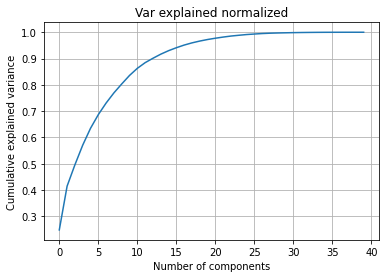

In [16]:
pca = PCA(n_components = 40)  # project from 42 to 40 dimensions

projectedZ = pca.fit_transform(Xscaled)
BasisW = pca.components_
print('Input Space:',Xscaled.shape)
print('Latent Space:',projectedZ.shape)
print(pca.explained_variance_)
print(BasisW.shape)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.title('Var explained normalized')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [45]:

def pca_function(Xscaled, q):
  pca = PCA(n_components = q)  # project from 42 to 40 dimensions

  projectedZ = pca.fit_transform(Xscaled)
  #projected = pca.inverse_transform(components)
  sns.set_style('darkgrid')
  #fig, ax = plt.subplots()
  projectedZDF = pd.DataFrame(data = projectedZ)
  projectedZDF['emociones'] = labels
  unique = labels.unique()
  palette = dict(zip(unique, sns.color_palette(n_colors=len(unique))))
  ax = sns.pairplot(data=projectedZDF, hue='emociones', palette=palette, corner = True)

  plt.tight_layout()
  plt.figure()

  return projectedZ


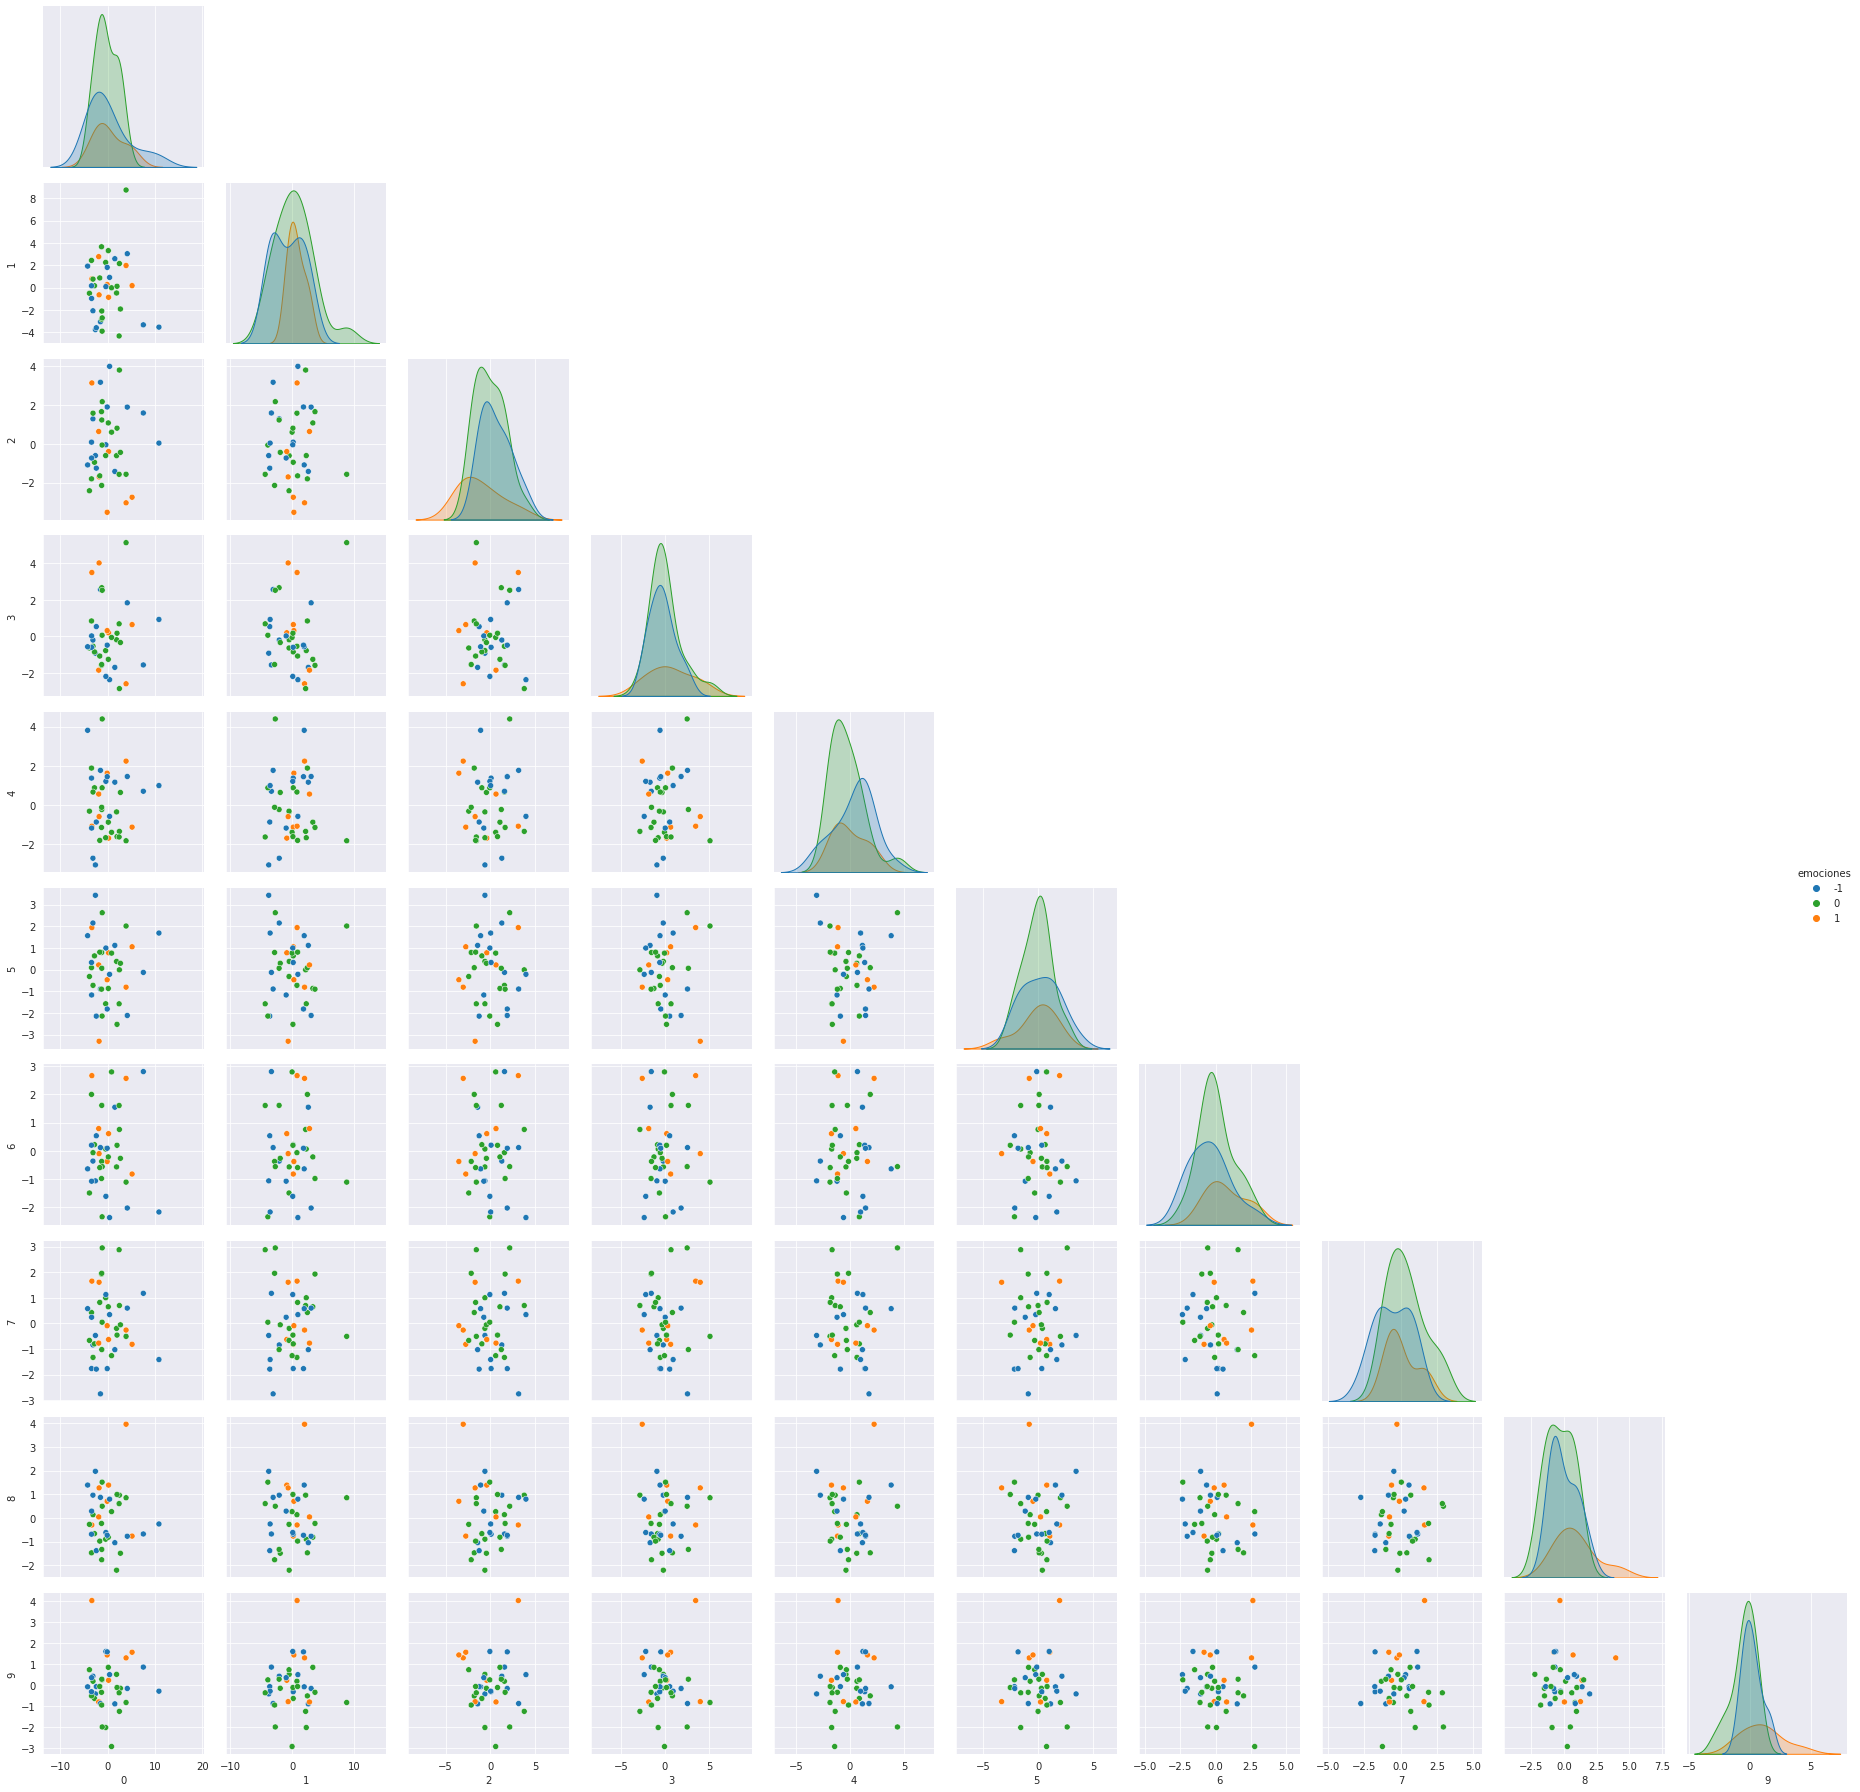

<Figure size 432x288 with 0 Axes>

In [46]:
projected_10 = pca_function(Xscaled, 10)

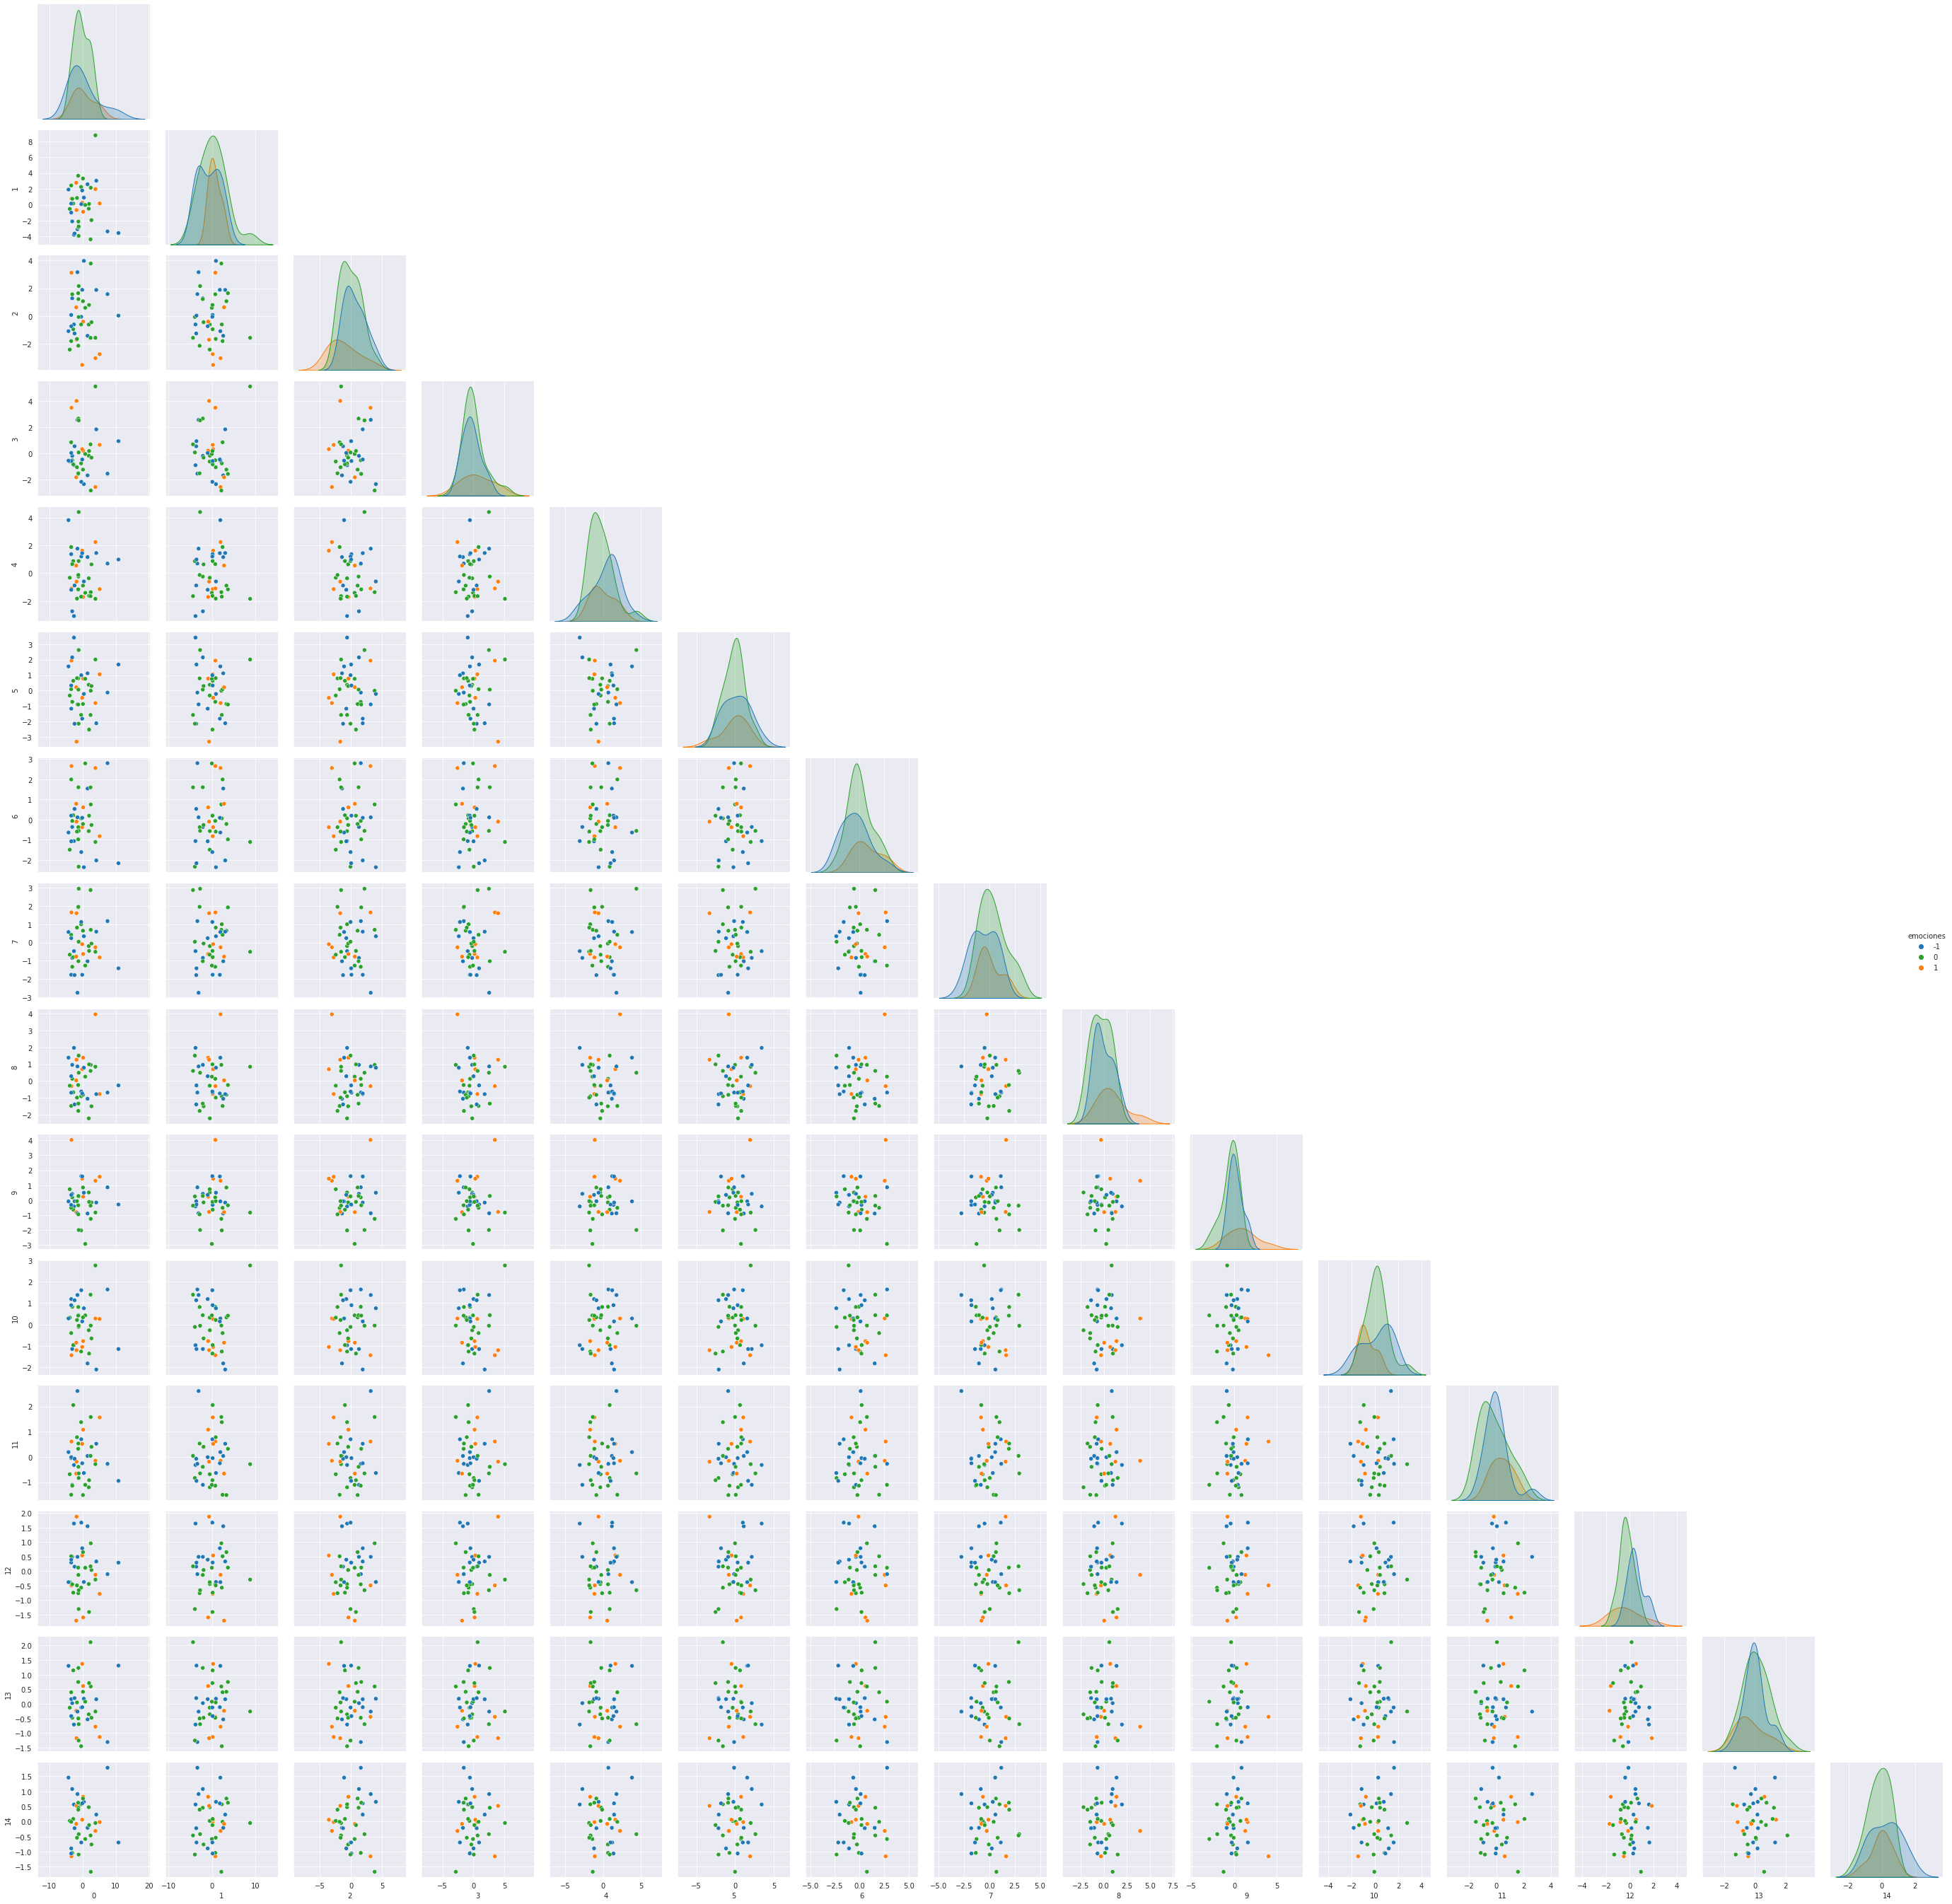

<Figure size 432x288 with 0 Axes>

In [47]:
projected_15 = pca_function(Xscaled, 15)

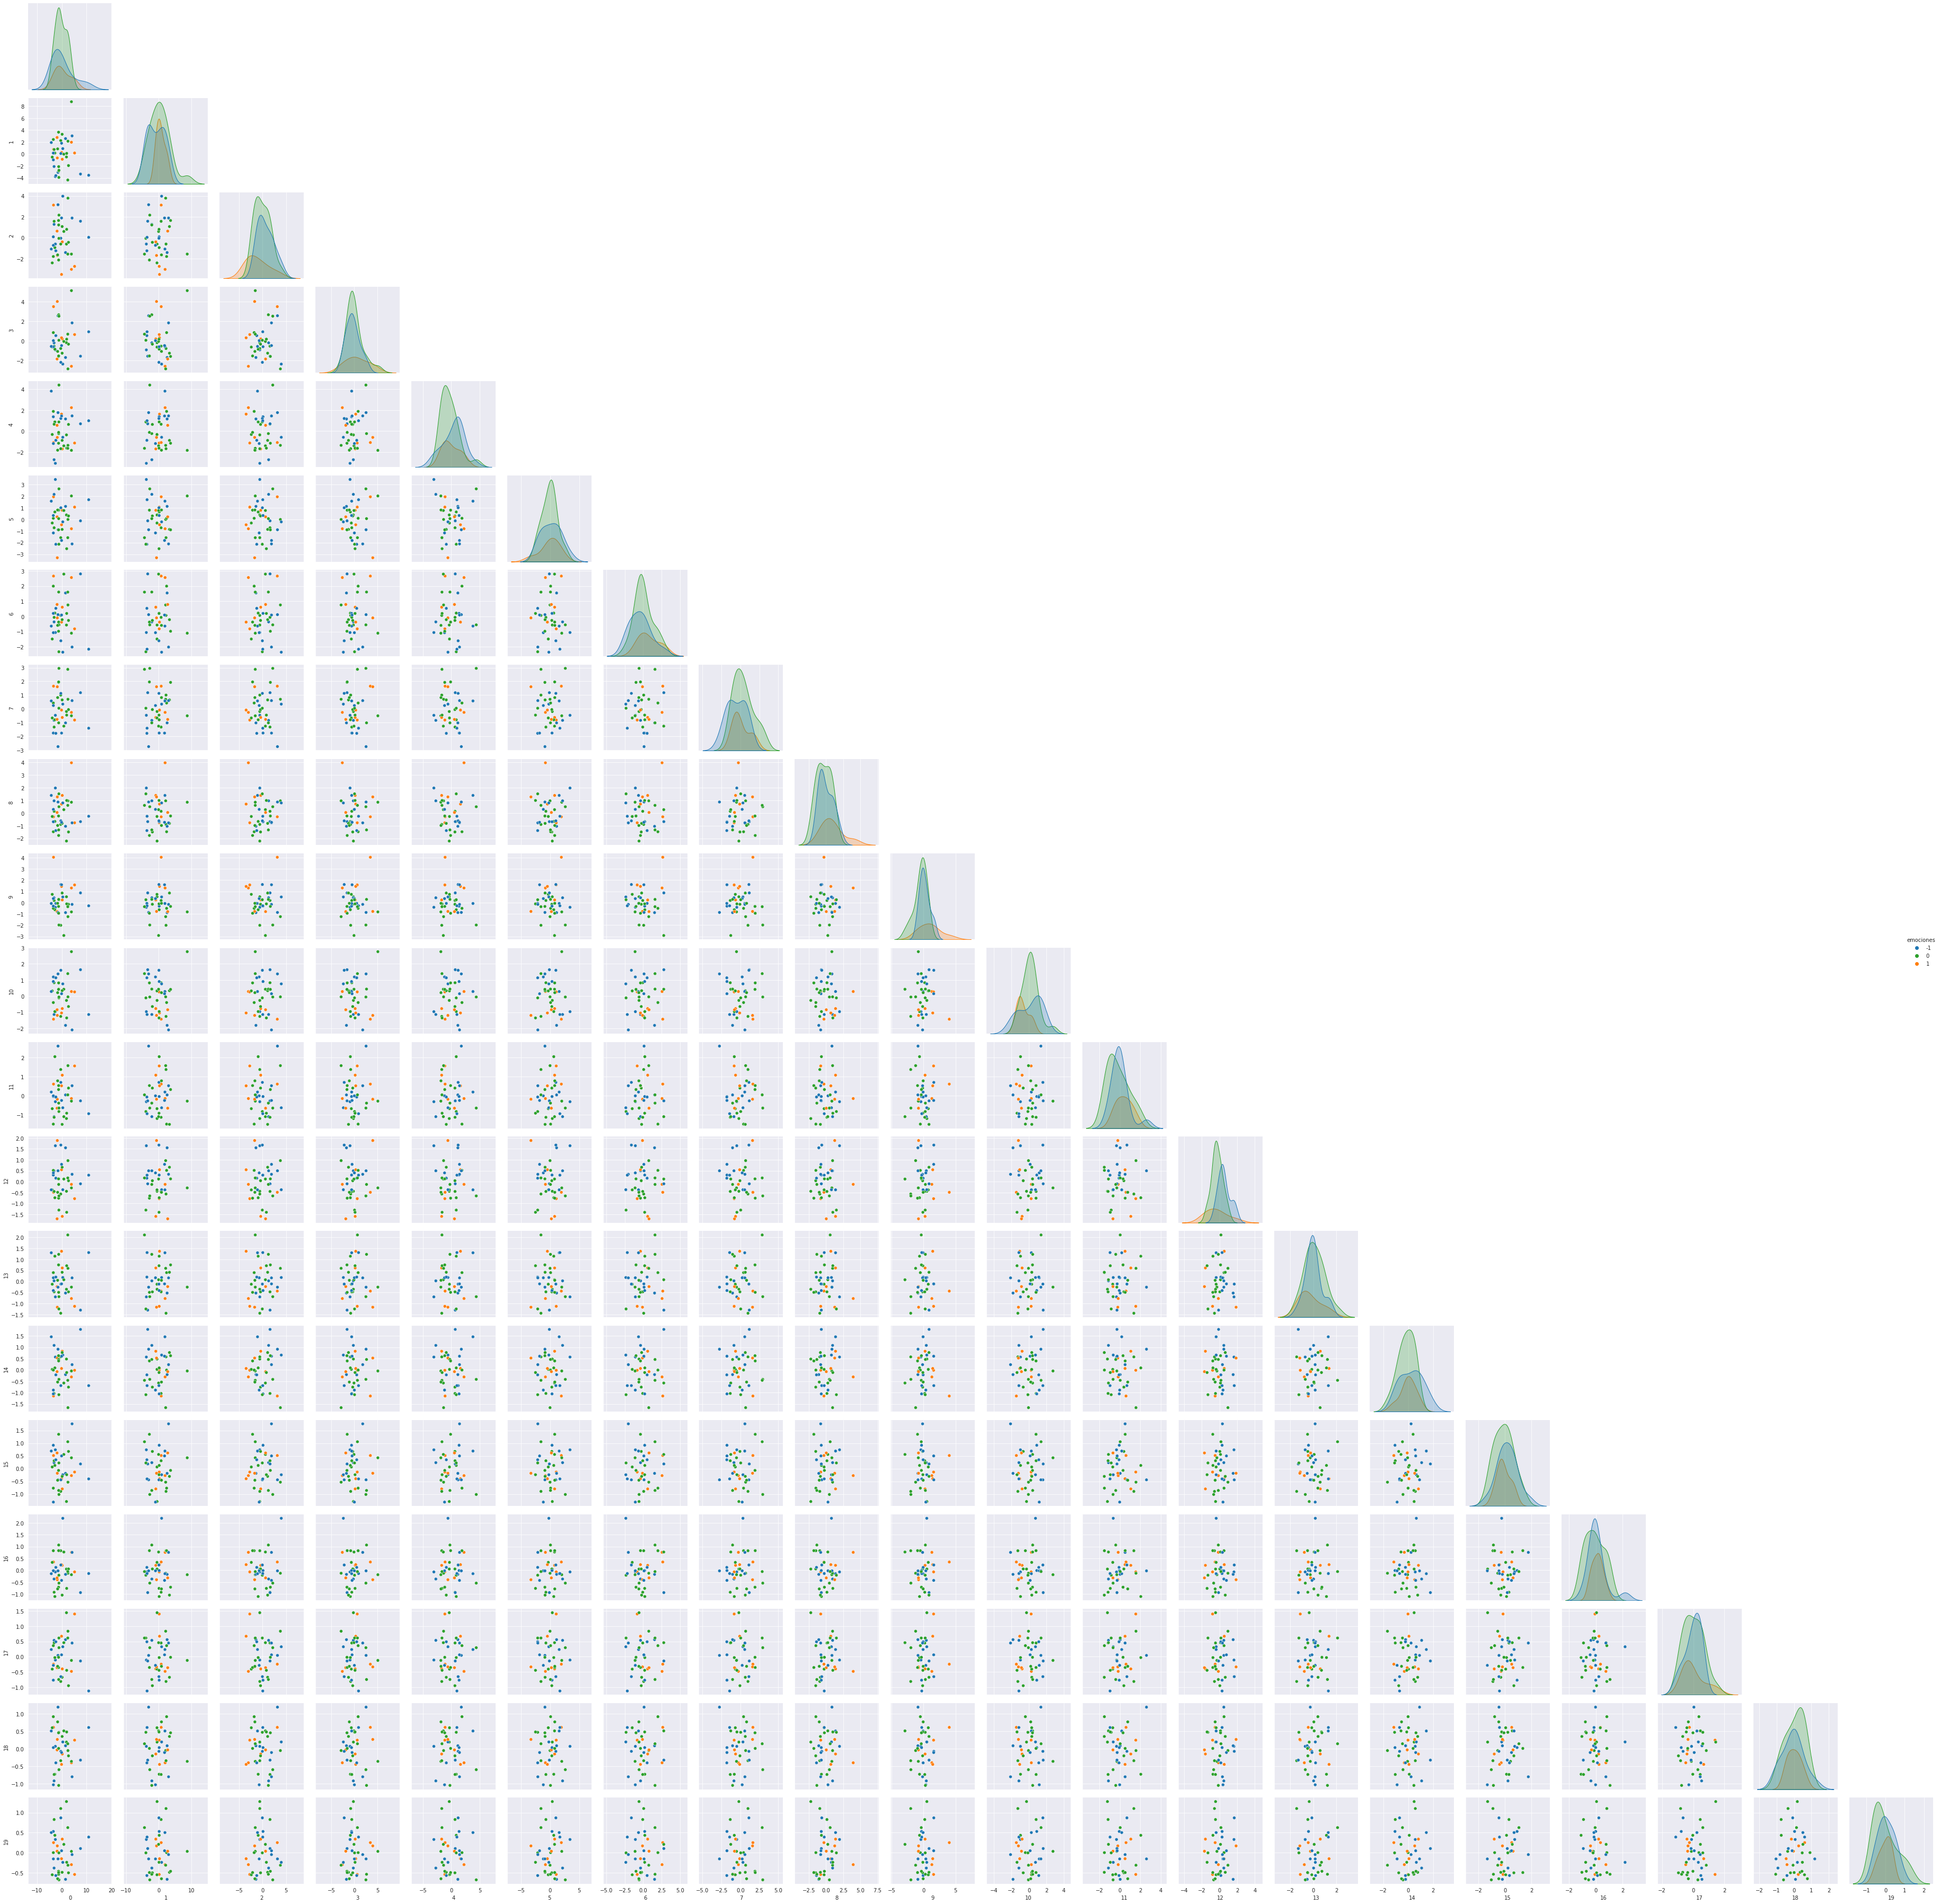

<Figure size 432x288 with 0 Axes>

In [48]:
projected_20 = pca_function(Xscaled, 20)

In [59]:
def Logistic_Regression(Xscaled):
  acc_train = []
  acc_test = []
  Nreps = 100
  for it in range(Nreps):

    Xtrain, Xtest, ytrain, ytest = train_test_split(Xscaled,labels,test_size=0.3)

    modelRL = LogisticRegression(C = 0.05)
    modelRL.fit(Xtrain,ytrain)

    y_est_train = modelRL.predict(Xtrain)
    y_est_test = modelRL.predict(Xtest)
    acc_train.append(accuracy_score(ytrain,y_est_train))
    acc_test.append(accuracy_score(ytest,y_est_test))


  print('Acc Train: ',np.mean(acc_train),'+/-',np.std(acc_train))
  print('Acc Test: ',np.mean(acc_test),'+/-',np.std(acc_test))

In [60]:
print('Accuaracy score for Xscaled \n')
Logistic_Regression(Xscaled)
print('\nAccuaracy score for projected_10 \n')
Logistic_Regression(projected_10)
print('\nAccuaracy score for projected_15 \n')
Logistic_Regression(projected_15)
print('\nAccuaracy score for projected_20 \n')
Logistic_Regression(projected_20)

Accuaracy score for Xscaled 

Acc Train:  0.8778571428571428 +/- 0.04231200919891398
Acc Test:  0.4325 +/- 0.1321273585934756

Accuaracy score for projected_10 

Acc Train:  0.7610714285714285 +/- 0.0554883238315292
Acc Test:  0.39083333333333337 +/- 0.1321273585934756

Accuaracy score for projected_15 

Acc Train:  0.8392857142857144 +/- 0.05900968443520825
Acc Test:  0.43 +/- 0.11530153704285316

Accuaracy score for projected_20 

Acc Train:  0.8578571428571427 +/- 0.05174998767622847
Acc Test:  0.42333333333333345 +/- 0.1217237309100681


In [62]:
def pca_function_no_graph(Xscaled, q):
  pca = PCA(n_components = q)  # project from 42 to 40 dimensions

  projectedZ = pca.fit_transform(Xscaled)

  return projectedZ

In [63]:
projected_7 = pca_function_no_graph(Xscaled, 7)
projected_10 = pca_function_no_graph(Xscaled, 10)
projected_13 = pca_function_no_graph(Xscaled, 13)
projected_16 = pca_function_no_graph(Xscaled, 16)
projected_19 = pca_function_no_graph(Xscaled, 19)
projected_22 = pca_function_no_graph(Xscaled, 22)
projected_25 = pca_function_no_graph(Xscaled, 25)

In [64]:
print('Accuaracy score for Xscaled \n')
Logistic_Regression(Xscaled)
print('\nAccuaracy score for projected_7 \n')
Logistic_Regression(projected_7)
print('\nAccuaracy score for projected_10 \n')
Logistic_Regression(projected_10)
print('\nAccuaracy score for projected_13 \n')
Logistic_Regression(projected_13)
print('\nAccuaracy score for projected_16 \n')
Logistic_Regression(projected_16)
print('\nAccuaracy score for projected_19 \n')
Logistic_Regression(projected_19)
print('\nAccuaracy score for projected_22 \n')
Logistic_Regression(projected_22)
print('\nAccuaracy score for projected_25 \n')
Logistic_Regression(projected_25)

Accuaracy score for Xscaled 

Acc Train:  0.8885714285714286 +/- 0.044112564733270056
Acc Test:  0.44499999999999995 +/- 0.12316429857894877

Accuaracy score for projected_7 

Acc Train:  0.6200000000000001 +/- 0.06823578569181712
Acc Test:  0.3450000000000001 +/- 0.12694049349553077

Accuaracy score for projected_10 

Acc Train:  0.7482142857142857 +/- 0.056327893912812496
Acc Test:  0.3949999999999999 +/- 0.11156711980786374

Accuaracy score for projected_13 

Acc Train:  0.822857142857143 +/- 0.05461367101032938
Acc Test:  0.47833333333333333 +/- 0.12282553118595137

Accuaracy score for projected_16 

Acc Train:  0.8514285714285715 +/- 0.04757378801527634
Acc Test:  0.4466666666666667 +/- 0.12666666666666668

Accuaracy score for projected_19 

Acc Train:  0.8492857142857143 +/- 0.04806988959540356
Acc Test:  0.45416666666666666 +/- 0.12325166214790866

Accuaracy score for projected_22 

Acc Train:  0.8664285714285714 +/- 0.05015791389731648
Acc Test:  0.44416666666666665 +/- 0.13073

In [66]:
from sklearn.naive_bayes import GaussianNB
def Bayesian_Regression(Xscaled):
  acc_train = []
  acc_test = []
  Nreps = 100
  for it in range(Nreps):

    Xtrain, Xtest, ytrain, ytest = train_test_split(Xscaled,labels,test_size=0.3)

    modelB = GaussianNB()
    modelB.fit(Xtrain,ytrain)

    y_est_train = modelB.predict(Xtrain)
    y_est_test = modelB.predict(Xtest)
    acc_train.append(accuracy_score(ytrain,y_est_train))
    acc_test.append(accuracy_score(ytest,y_est_test))


  print('Acc Train: ',np.mean(acc_train),'+/-',np.std(acc_train))
  print('Acc Test: ',np.mean(acc_test),'+/-',np.std(acc_test))

In [67]:
print('Accuaracy score for Xscaled \n')
Bayesian_Regression(Xscaled)
print('\nAccuaracy score for projected_7 \n')
Bayesian_Regression(projected_7)
print('\nAccuaracy score for projected_10 \n')
Bayesian_Regression(projected_10)
print('\nAccuaracy score for projected_13 \n')
Bayesian_Regression(projected_13)
print('\nAccuaracy score for projected_16 \n')
Bayesian_Regression(projected_16)
print('\nAccuaracy score for projected_19 \n')
Bayesian_Regression(projected_19)
print('\nAccuaracy score for projected_22 \n')
Bayesian_Regression(projected_22)
print('\nAccuaracy score for projected_25 \n')
Bayesian_Regression(projected_25)

Accuaracy score for Xscaled 

Acc Train:  0.8564285714285715 +/- 0.05669017119575565
Acc Test:  0.32500000000000007 +/- 0.11577036657874837

Accuaracy score for projected_7 

Acc Train:  0.7432142857142857 +/- 0.07469239641109832
Acc Test:  0.3441666666666666 +/- 0.1090712050807993

Accuaracy score for projected_10 

Acc Train:  0.7960714285714284 +/- 0.06571719714047458
Acc Test:  0.40333333333333343 +/- 0.1110055053689781

Accuaracy score for projected_13 

Acc Train:  0.9385714285714286 +/- 0.039149113160127764
Acc Test:  0.47416666666666657 +/- 0.13929136130188882

Accuaracy score for projected_16 

Acc Train:  0.9321428571428569 +/- 0.04778245771521304
Acc Test:  0.45166666666666666 +/- 0.12482209562235189

Accuaracy score for projected_19 

Acc Train:  0.9596428571428571 +/- 0.032986933096334374
Acc Test:  0.44416666666666665 +/- 0.12695963925594622

Accuaracy score for projected_22 

Acc Train:  0.9910714285714284 +/- 0.01546473935329354
Acc Test:  0.4416666666666667 +/- 0.12665